In [ ]:
!git clone https://github.com/WongKinYiu/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Total 781 (delta 0), reused 0 (delta 0), pack-reused 781 (from 1)
Receiving objects: 100% (781/781), 3.27 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (330/330), done.


In [ ]:
%cd yolov9

/content/yolov9


In [ ]:
!pip install -r requirements.txt -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.3 MB/s eta 0:00:00


In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content/yolov9


In [ ]:
!mkdir -p /content/yolov9/weights

In [ ]:
!wget -p /content -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -p /content/yolov9/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

In [ ]:
!ls -la /content/yolov9/weights

total 237684
drwxr-xr-x  2 root root      4096 Feb 14 04:49 .
drwxr-xr-x 13 root root      4096 Feb 14 04:47 ..
-rw-r--r--  1 root root 103153312 Feb 14 04:49 yolov9-c.pt
-rw-r--r--  1 root root 140217688 Feb 14 04:50 yolov9-e.pt


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="k2onb322FFyqVsjq1pVk")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-2 in yolov9:: 100%|██████████| 6472/6472 [00:01<00:00, 5770.70it/s]


In [ ]:
%ls -la {HOME}/weights/yolov9-e.pt

-rw-r--r-- 1 root root 140217688 Feb 13 05:10 /content/yolov9/weights/yolov9-e.pt


In [ ]:
%cd yolov9

[Errno 2] No such file or directory: 'yolov9'
/content/yolov9


In [ ]:
!python train_dual.py --workers 8 --device 0 --batch 8 --data 'PPE_Detection-2/data.yaml' --img 640 --cfg models/detect/yolov9-e.yaml --weights '{HOME}/weights/yolov9-e.pt' --name yolov9-e-finetuning --hyp hyp.scratch-high.yaml --min-items 0 --epochs 30 --close-mosaic 15

2025-02-14 04:53:15.038847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739508795.271651    2944 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739508795.336835    2944 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 04:53:15.826566: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: E

In [ ]:
%cd ..


/content


In [ ]:
!zip -r folder_name.zip yolov9


Streaming output truncated to the last 5000 lines.
  adding: yolov9/PPE_Detection-2/train/images/image_30_jpg.rf.54dbaef56300d14f463c56f09ea1f8f6.jpg (deflated 0%)
  adding: yolov9/PPE_Detection-2/train/images/SikctinTwo0211_jpg.rf.c6ee8374eb1f34dc9cb31ddb32d3a9ab.jpg (deflated 1%)
  adding: yolov9/PPE_Detection-2/train/images/image_287_jpg.rf.417e5d393a39fb4ee482bb8bc11e0df2.jpg (deflated 0%)
  adding: yolov9/PPE_Detection-2/train/images/image_58_jpg.rf.858a184f24f5b2149906f9e37d8ca13d.jpg (deflated 0%)
  adding: yolov9/PPE_Detection-2/train/images/SikctinTwo0589_jpg.rf.5f193319b9f1c6d52be1c41d2f0967c2.jpg (deflated 0%)
  adding: yolov9/PPE_Detection-2/train/images/image_242_jpg.rf.ffebbc13a53b32e6940a32ece4bf82f3.jpg (deflated 0%)
  adding: yolov9/PPE_Detection-2/train/images/image_46_jpg.rf.7b786e469b1bec0c77d328d72b4d4f96.jpg (deflated 0%)
  adding: yolov9/PPE_Detection-2/train/images/image_133_jpg.rf.880b9469ec814203339c0c8541e81919.jpg (deflated 0%)
  adding: yolov9/PPE_Detection

In [ ]:
from google.colab import files
files.download('folder_name.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
%cd "/content/drive/MyDrive/yolo/yolov9"

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-df54fd9576c5>", line 1, in <cell line: 0>
    get_ipython().run_line_magic('cd', '"/content/drive/MyDrive/yolo/yolov9"')
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
                              ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
             ^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occ

In [3]:
!gdown "https://drive.google.com/uc?id=140oaWpcxsbZM9glqzeUYHR5gQT_wERX6&confirm=t"

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Error:

	[Errno 107] Transport endpoint is not connected: '.'

To report issues, please visit https://github.com/wkentaro/gdown/issues.


In [4]:
!ls runs/train/yolov9-e-finetuning/

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot access 'runs/train/yolov9-e-finetuning/': Transport endpoint is not connected


In [5]:
from IPython.display import Image

In [6]:
Image(filename=f"runs/train/yolov9-e-finetuning/results.png", width=1000)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-4bae8a389d63>", line 1, in <cell line: 0>
    Image(filename=f"runs/train/yolov9-e-finetuning/results.png", width=1000)
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/display.py", line 1231, in __init__
    super(Image, self).__init__(data=data, url=url, filename=filename,
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/display.py", line 637, in __init__
    self.reload()
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/display.py", line 1263, in reload
    super(Image,self).reload()
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/display.py", line 662, in reload
    with open(self.filename, self._read_flags) as f:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected: 

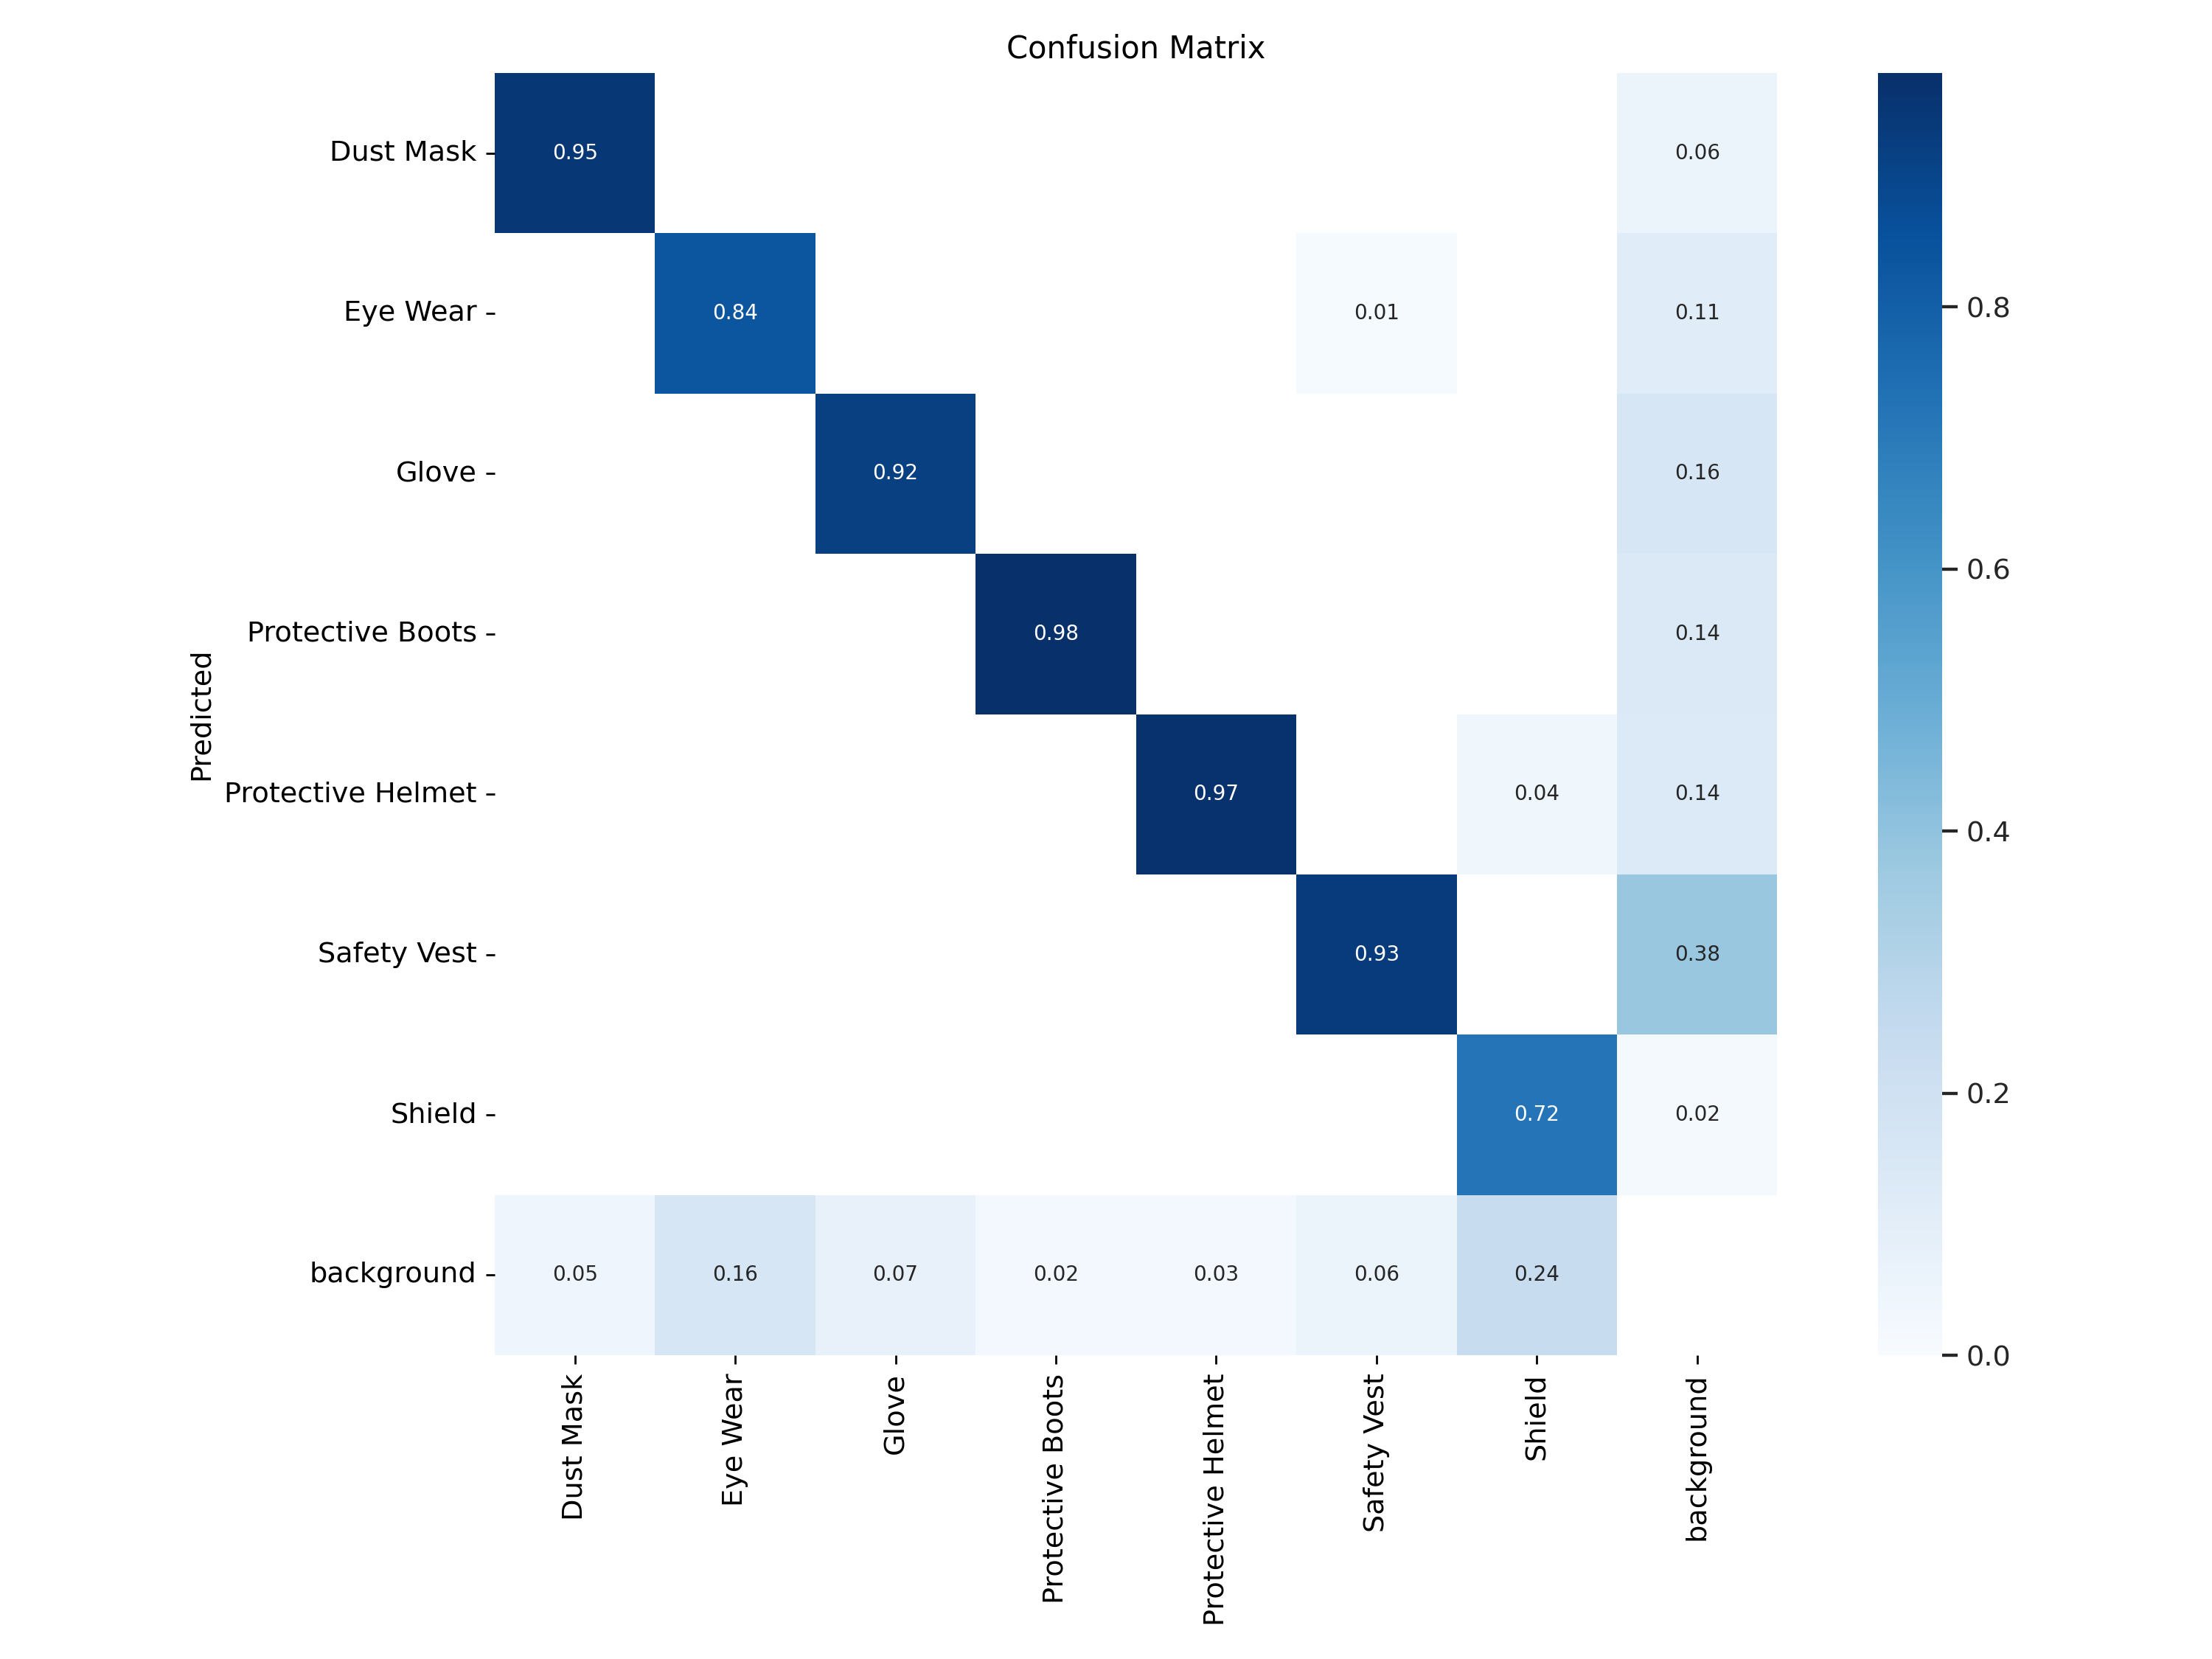

In [7]:
Image(filename=f"runs/train/yolov9-e-finetuning/confusion_matrix.png", width=1000)

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/val_batch0_pred.jpg", width=1000)

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolov9/runs/train/yolov9-e-finetuning/val_batch0_pred.jpg'

In [ ]:
%cd yolov9

/content/yolov9


In [9]:

!python val_dual.py --data 'PPE_Detection-2/data.yaml' --img 640 --batch 16 --conf 0.001 --iou 0.7 --device cpu --weights 'runs/train/yolov9-e-finetuning/weights/best.pt' --save-json --name yolov9_ppe_c_640_val


val_dual: data=PPE_Detection-2/data.yaml, weights=['runs/train/yolov9-e-finetuning/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=cpu, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=yolov9_ppe_c_640_val, exist_ok=False, half=False, dnn=False, min_items=0
fatal: Not a valid object name HEAD
YOLO 🚀 2025-2-14 Python-3.11.11 torch-2.5.1+cu124 CPU

/content/drive/MyDrive/yolo/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `Tru

In [ ]:
!gdown "https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t
To: /content/yolov9/PPE_Part1.mp4
100% 14.2M/14.2M [00:01<00:00, 11.1MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t
To: /content/yolov9/PPE_Part2.mp4
100% 11.1M/11.1M [00:00<00:00, 25.2MB/s]


In [ ]:
# inference yolov9 models
!python detect_dual.py --source 'PPE_Detection-2/valid/images/85_jpg.rf.bb831a912c797ce2a13ad85fe9e6094e.jpg' --img 640 --device 0 --weights 'best.pt' --name yolov9_c_ppe_640_detect


detect_dual: weights=['best.pt'], source=PPE_Detection-2/valid/images/85_jpg.rf.bb831a912c797ce2a13ad85fe9e6094e.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_c_ppe_640_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more

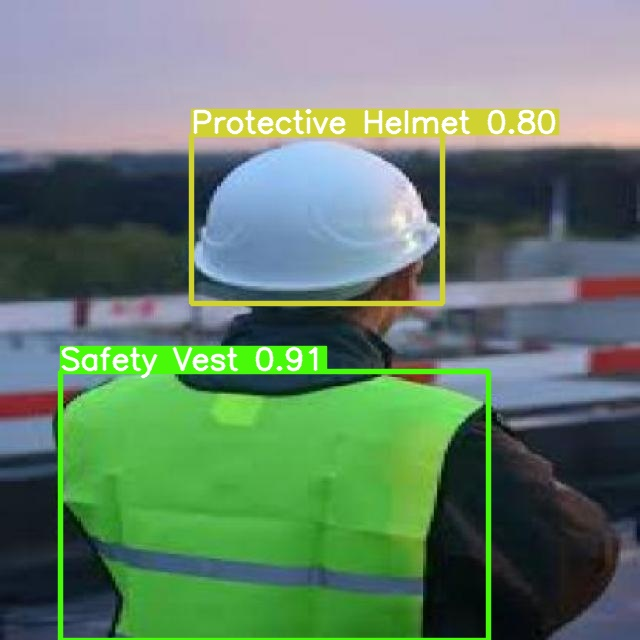

In [ ]:
Image(filename=f"{HOME}/runs/detect/yolov9_c_ppe_640_detect/85_jpg.rf.bb831a912c797ce2a13ad85fe9e6094e.jpg")

In [ ]:
# inference yolov9 models
!python detect_dual.py --source 'PPE_Part1.mp4' --img 640 --device 0 --weights 'best.pt' --name yolov9_ppe_640_detect


detect_dual: weights=['best.pt'], source=PPE_Part1.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_ppe_640_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_o

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = 'runs/detect/yolov9_ppe_640_detect/PPE_Part1.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)